In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Esse notebook servirá apenas como um treino para o uso do BERTopic, para isso utilizarei um dataset de letras de músicas disponíveis no kaggle (https://www.kaggle.com/datasets/neisse/scrapped-lyrics-from-6-genres?select=lyrics-data.csv)
O obejtivo é apenas testar as modularizações do BERTopic, entender seu funcionamento, testar alguns métodos, ver as formas de visualização e os resultados gerados.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/lyrics-data.csv')
df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


#Selecionando dados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB


In [ ]:
df['language'].unique()

array(['pt', 'es', 'en', nan, 'it', 'gl', 'fr', 'de', 'tl', 'et', 'fi',
       'pl', 'da', 'st', 'sv', 'ro', 'af', 'no', 'eu', 'rw', 'sw', 'ga',
       'cy', 'ca', 'ny', 'ko', 'ar', 'gd', 'tr', 'id', 'su', 'lg', 'ru',
       'nl', 'sq', 'is', 'cs', 'jw', 'lv', 'hu', 'ms', 'ku', 'zh', 'hr',
       'ht', 'fa', 'mg', 'vi', 'ja', 'hmn', 'sr', 'iw', 'sl'],
      dtype=object)

In [ ]:
df[df['language']=='pt'].count()

ALink       157393
SName       157393
SLink       157393
Lyric       157393
language    157393
dtype: int64

Há 157393 músicas em português nesse dataset, uma quantidade maior que o necessário para apenas um treino, irei além de formar um dataset apenas com músicas em português, selecionar alguns artistas.

In [ ]:
df_portugues=df[df['language']=='pt']
df_portugues

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379626,/xama-gideon-dos-lakotas/,Hino 96 - a Chave de Ser,/xama-gideon-dos-lakotas/hino-96-a-chave-de-se...,Esclarecimentos Maiores\nEntrego agora a chave...,pt
379627,/xama-gideon-dos-lakotas/,Hino 97 - Invocação,/xama-gideon-dos-lakotas/hino-97-invocacao.html,Invocação Eu Sou\nEu Sou a presença Divina Eu ...,pt
379628,/xama-gideon-dos-lakotas/,Hino 98 - Conhecimentos,/xama-gideon-dos-lakotas/hino-98-conhecimentos...,Aqui na fazenda ensinamos a você todo conhecim...,pt
379792,/miriam-makeba/,Chove Chuva,/miriam-makeba/chove-chuva.html,Chove chuva\nChove sem parar\nChove chuva\nCho...,pt


In [ ]:
df_portugues['ALink'].nunique()

2427

In [ ]:
unique_values = df_portugues['ALink'].unique()
l=[]
for value in unique_values:
    l.append(value)
l

['/ivete-sangalo/',
 '/chiclete-com-banana/',
 '/banda-eva/',
 '/e-o-tchan/',
 '/claudia-leitte/',
 '/harmonia-do-samba/',
 '/ara-ketu/',
 '/daniela-mercury/',
 '/olodum/',
 '/netinho/',
 '/asa-de-aguia/',
 '/cheiro-de-amor/',
 '/timbalada/',
 '/carlinhos-brown/',
 '/tomate/',
 '/jammil-e-uma-noites/',
 '/luiz-caldas/',
 '/margareth-menezes/',
 '/jauperi/',
 '/babado-novo/',
 '/parangole/',
 '/psirico/',
 '/banda-grafith/',
 '/tchakabum/',
 '/banda-mel/',
 '/black-style/',
 '/chicabana/',
 '/banda-beijo/',
 '/axe-bahia/',
 '/oz-bambaz/',
 '/rapazolla/',
 '/tonho-materia/',
 '/alexandre-peixe/',
 '/leva-noiz/',
 '/lucas-fellix/',
 '/saiddy-bamba/',
 '/sharon-axe-moi/',
 '/talokudo/',
 '/ta-demais/',
 '/samir-matos/',
 '/ouro-fino/',
 '/gab-ferruz/',
 '/cannibal/',
 '/uata-anderson/',
 '/john-legend/',
 '/racionais-mcs/',
 '/justin-timberlake/',
 '/akon/',
 '/snoop-dogg/',
 '/jennifer-lopez/',
 '/lauryn-hill/',
 '/flo-rida/',
 '/nelly/',
 '/thalles-roberto/',
 '/seu-jorge/',
 '/lil-wayne

Há muitos nomes, como o objetivo é topicalizar os assuntos da música e não os gêneros, vou escolher aleatoriamente um número de cantores suficientes para ter uma boa quantidade de dados.

In [ ]:
import random
seed = 1237
random.seed(seed)
n_artistas=40
nomes_escolhidos = random.sample(l, n_artistas)
print(nomes_escolhidos)

['/mattos-nascimento/', '/billy-joel/', '/masha-e-o-urso/', '/nicolai/', '/laercio-oliveira/', '/lo-borges/', '/fred-e-gustavo/', '/boca-livre/', '/suel/', '/roberto-maia/', '/padre-juarez-de-castro/', '/teodoro-e-sampaio/', '/rafaela-pinho/', '/banda-san-marino/', '/imperador-do-ipiranga/', '/marcela-jardim/', '/sabotage/', '/dead-fish/', '/canal-da-lele/', '/mc-vine/', '/banda-mantra/', '/henrique-e-diego/', '/sandy-junior/', '/fernandinho/', '/bela-a-feia/', '/anitta/', '/brigadeiro/', '/bereana-louvor-e-adoracao/', '/althair-alexandre/', '/ministerio-ipiranga/', '/soraya-moraes/', '/hillsong-kids/', '/almir-sater/', '/luzia-costa/', '/padre-zezinho/', '/gino-e-geno/', '/rick-rock/', '/trivium/', '/fogo-cruzado/', '/elba-ramalho/']


In [ ]:
df_pt_escolhido=df_portugues[df_portugues['ALink'].isin(nomes_escolhidos)]
df_pt_escolhido

,ALink,SName,SLink,Lyric,language
43098,/anitta/,Menina Má,/anitta/menina-ma.html,"Me olha e deseja que eu veja\nMas já digo: ""nã...",pt
43100,/anitta/,Show Das Poderosas,/anitta/show-das-poderosas.html,Prepara que agora é a hora\nDo show das podero...,pt
43102,/anitta/,Meiga e Abusada,/anitta/meiga-e-abusada.html,"Eu, posso conquistar tudo que eu quero\nMas, f...",pt
43103,/anitta/,Bang,/anitta/bang.html,"Vem na maldade, com vontade\nChega encosta em ...",pt
43106,/anitta/,Zen,/anitta/zen.html,Uh Uh Uh Uh\n\nOlha 'cê' me faz tão bem\nSó de...,pt
...,...,...,...,...,...
375759,/bela-a-feia/,Heroina E Vilã - Ana Carolina,/bela-a-feia/heroina-e-vila-ana-carolina.html,Estenda no chão\nO tapete que eu quero passar\...,pt
375761,/bela-a-feia/,Mamãe Passou Açúcar Em Mim - Wilson Simonal,/bela-a-feia/mamae-passou-acucar-em-mim-wilson...,Eu sei que tenho muitas garotas\nTodas gamadin...,pt
375763,/bela-a-feia/,Nave do Amor - Banda Djavú,/bela-a-feia/nave-do-amor-banda-djavu.html,Sou dependente de você\né o delírio da paixão\...,pt
375764,/bela-a-feia/,Sou Maluca - Dolls,/bela-a-feia/sou-maluca-dolls.html,Não existe fronteira pra me segurar\nNão exist...,pt


Recomendações dizem que o BERTopic funciona bem com no mínimo 1000 documentos, 4070 então é um número suficiente para o treino.

In [ ]:
df_pt_escolhido = df_pt_escolhido.reset_index(drop=True)

In [ ]:
print(df_pt_escolhido['Lyric'][5])

Essa mina é louca
Quando eu tô bolado ela quer beijar na boca
Se eu tô com frio ela tira a minha roupa
Louca, essa mina é louca

Essa mina é louca
Quando eu tô bolado ela quer beijar na boca
Se eu tô com frio ela tira a minha roupa
Louca, essa mina é louca

A gente sabe viver
Conviver, dando prazer
Anoitecer, amanhecer
Eu e você, eu e você

E eu gosto dela
Ela é encantada, ela é minha cinderela
Becos e vielas fazem sua passarela
Vagabundo pira com a mina na favela
É ela

Que te ensina certin
Faço tudin, bem devagarin
Pede gostosin, vem cá meu pretin
Desse jeito cê me deixa louquin

Essa mina é louca
Quando eu tô bolado ela quer beijar na boca
Se eu tô com frio ela tira a minha roupa
Louca, essa mina é louca

Essa mina é louca
Quando eu tô bolado ela quer beijar na boca
Se eu tô com frio ela tira a minha roupa
Louca, essa mina é louca

É que eu fui eleita a louca perfeita
Que tem a receita que se é feita com confeito
Que é feito com o coração
Tem tudo o que almeja, não importa o que sej

#BERTopic simples:

A documentação do BERTopic diz não ser recomendado o pré-processamento dos textos caso ele não tenha problemas muito grandes como tags html, logo para um teste primário, no qual não alterarei nada, também não farei o pré-processamento por enquanto, caso veja necessidade farei mais a frente.

Então vamos para a aplicação mais simples do BERTopic:

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (se

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic()

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2323,-1_que_no_eu_de,"[que, no, eu, de, me, pra, se, voc, meu, um]",[Elevo minha voz aos céus\nSerá que podes me o...
1,0,604,0_jesus_senhor_deus_de,"[jesus, senhor, deus, de, ele, santo, cristo, ...",[Dia a dia vou viver Com meu rei Jesus\nLado a...
2,1,222,1_de_do_no_um,"[de, do, no, um, terra, da, que, rio, na, pra]","[Numa festa de peão que eu fui, vi um caso mui..."
3,2,96,2_casa_no_de_que,"[casa, no, de, que, ela, tem, um, uma, na, em]",[Tentaram derrubar a nossa casa\nMas a nossa c...
4,3,90,3_volta_voltar_eu_que,"[volta, voltar, eu, que, te, pra, voc, no, de,...","[Saudade, sempre aparece quando o coração pede..."
5,4,84,4_amor_eu_que_no,"[amor, eu, que, no, voc, por, de, corao, meu, ...",[Conhece todos meus segredos\nSabe o ponto fra...
6,5,75,5_que_no_pra_se,"[que, no, pra, se, voc, de, em, vo, mais, vai]",[Dead Fish - Canção para amigos\nAlbum: Sonho ...
7,6,72,6_senhor_meu_ti_teu,"[senhor, meu, ti, teu, tua, me, corao, tu, te,...","[Estou aqui mais uma vez, me derramar\nO que h..."
8,7,60,7_pa_ra_voc_vai,"[pa, ra, voc, vai, eu, vou, no, me, pra, que]","[La ra ra, la ra ra ra ra, la ra ra ra ra ah a..."
9,8,53,8_eu_que_no_sei,"[eu, que, no, sei, voc, mas, te, me, turu, meu]",[Por que será que eu insisto em insistir em vo...


In [ ]:
topic_model.visualize_topics()

Nessa primeira visualização, alguns problemas são nítidos, mais da metade dos textos foi considerado outlier, não remover stopwords foi um problema, tópicos inteiros, como o 1, foram baseados nelas. Há duas formas com possíveis resoluções, mudar os embedding padrão, de língua inglesa para um multilíngua ou mesmo um em português, ou apenas remover as stopwords diretamente no dataframe.
Uma outra solução é mudar a forma de representação dos tópicos, algo que verei mais a frente.

Para seguir o objetivo desse notebook, não vou remover as stopwords, vou seguir a abordagem de troca de tipo de embeddings usado, os embeddings que são o primeiro passo do BERTopic.

#Mudança de embeddings:

Vou começar com a mudança para um embedding multilíngua e começar a explorar os parâmetros do BERTopic, mudando o parâmetro de língua para multilingual.

In [ ]:
topic_model2 = BERTopic(embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual')
topicos2, probs2 = topic_model2.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model2.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,961,-1_que_de_deus_eu,"[que, de, deus, eu, não, do, senhor, me, meu, em]",[Nicolai & Larissa Povinske - Intimidade\n\nEl...
1,0,2397,0_que_eu_não_de,"[que, eu, não, de, pra, me, você, se, um, meu]",[Sou Sabotage\nUm bom lugar\nSe constrói com h...
2,1,180,1_deus_senhor_me_eu,"[deus, senhor, me, eu, tua, teu, meu, que, te,...","[Venho a ti,\nEntregar a minha vida em tuas mã..."
3,2,112,2_jesus_ele_cruz_cristo,"[jesus, ele, cruz, cristo, eu, me, sangue, fel...",[Eu não sei explicar\nquanto amor tem por mim\...
4,3,87,3_que_não_se_mais,"[que, não, se, mais, de, em, pra, um, você, do]",[O mesmo céu\nA mesma cor\nQuanto tempo passou...
5,4,58,4_maria_mãe_ave_de,"[maria, mãe, ave, de, senhora, jesus, que, teu...",[Maria santa de Jesus\nMaria pura de José\nQue...
6,5,56,5_deus_aleluia_ale_senhor,"[deus, aleluia, ale, senhor, santo, és, teu, b...","[Não há outro como tu só Tu és Deus,\nTu és o ..."
7,6,39,6_que_de_não_um,"[que, de, não, um, se, quem, os, com, do, vou]",[Se Ele voltasse algum dia\nquem se lembraria ...
8,7,25,7_fogo_deus_manda_espírito,"[fogo, deus, manda, espírito, altar, aqui, gló...",[A igreja primitiva era cheia do poder\nTinha ...
9,8,21,8_filho_meu_te_tu,"[filho, meu, te, tu, eu, que, alguém, pródigo,...",[O filho pródigo sou eu\n(Matos nascimento)\nQ...


In [ ]:
topic_model2.visualize_topics()

O número de tópicos diminuiu um pouco, muitos aparentam ter algum sentido, porém ainda há problemas com as stopwords.

Vou apenas remover as stopwords da representação final e refazer com os mesmo modelos do anterior, adcionando um único parâmetro para evitar aleatoriedade

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_pt=list(stopwords_pt)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model  = CountVectorizer(stop_words=stopwords_pt)

In [ ]:
from umap import UMAP
umap_model = UMAP(random_state=57)

In [ ]:
topic_model3 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos3, probs3 = topic_model3.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model3.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,802,-1_deus_jesus_pra_vai,"[deus, jesus, pra, vai, paz, senhor, amor, vid...",[Quando cristo expirou\nA minha vida transform...
1,0,2249,0_pra_amor_vai_vou,"[pra, amor, vai, vou, quero, coração, tá, tô, ...",[Pra ganhar o seu amor\nEu de tudo sou capaz\n...
2,1,553,1_deus_senhor_santo_ti,"[deus, senhor, santo, ti, és, jesus, glória, v...","[De joelhos estou, mais uma vez\nDe joelhos es..."
3,2,100,2_deus_mundo_luz_jesus,"[deus, mundo, luz, jesus, pra, paz, senhor, bi...",[Todos homens são distintos demais\nTodos sent...
4,3,69,3_pra_chorou_amor_tô,"[pra, chorou, amor, tô, coração, mulher, sauda...",[Ela sentiu saudade\nEla me ligou\nE por telef...
5,4,62,4_pra_tudo_outro_atômica,"[pra, tudo, outro, atômica, presidente, todos,...",[Já que existe no sul esse conceito\nQue o nor...
6,5,51,5_maria_mãe_ave_senhora,"[maria, mãe, ave, senhora, jesus, porque, naza...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
7,6,43,6_jesus_estendeu_feliz_mim,"[jesus, estendeu, feliz, mim, mão, cruz, deus,...",[A minha alma estava longe no caminho do céu\n...
8,7,38,7_jesus_cruz_cristo_mim,"[jesus, cruz, cristo, mim, aleluia, deus, morr...",[Eu não sei explicar\nquanto amor tem por mim\...
9,8,23,8_shalom_paz_dai_pão,"[shalom, paz, dai, pão, deus, luz, irmão, acei...","[Paz ao mundo\n\nPaz, paz, paz eu te desejo a ..."


In [ ]:
topic_model3.visualize_topics()

As stopwords pararam de representar tópicos inteiros, o número de outliers também caiu muito, porém o número de tópicos está provavelmente muito baixo e muitos tópicos parecem representar músicas de tema parecidos

##Agora usarei o spacy como embedding, os outros parâmetros serão os mesmos, remoção de stopwords na representação e um random_state fixo.

In [ ]:
!python3 -m spacy download pt_core_news_lg

2023-09-05 20:06:10.269976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
import spacy

spacy.prefer_gpu()
spacy_em = spacy.load("pt_core_news_lg", exclude=['tagger', 'parser', 'ner',
                                             'attribute_ruler', 'lemmatizer'])

topic_model4 = BERTopic(embedding_model=spacy_em, language='multilingual', vectorizer_model  = vectorizer_model)

In [ ]:
topicos4, probs4 = topic_model4.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model4.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,17,-1_luiza_enviado_pra_janeiro,"[luiza, enviado, pra, janeiro, mar, oxum, tô, ...",[Estrela miúda que alumeia o mar\nAlumiá terra...
1,0,3939,0_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, quero, mi...",[Jesus Cristo é o senhor eu posso ver\nSua gló...
2,1,97,1_deus_senhor_coração_vida,"[deus, senhor, coração, vida, vou, jesus, pra,...",[SENHOR NÃO TENHO IDADE PRA CHORAR O MEU PASSA...
3,2,17,2_a7_em7_dm7_m7,"[a7, em7, dm7, m7, eb7, e7, bm7, cm7, dm, a9]",[O SILÊNCIO ESTÁ CANTANDO\nMeditação (Padre Ze...


Não ficou nada bom

##Agora testando com um embedding disponível no hugging face:

In [ ]:
from transformers.pipelines import pipeline

embedding_model = pipeline("feature-extraction", model="xlm-roberta-base")

In [ ]:
topic_model5 = BERTopic(embedding_model= embedding_model, vectorizer_model  = vectorizer_model)

In [ ]:
topicos5, probs5 = topic_model5.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model5.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,42,-1_pra_perdido_tudo_vem,"[pra, perdido, tudo, vem, gente, amor, faz, co...",[Pout-Pourri II:\nMinha Fama de Mau\n(Erasmo C...
1,0,3825,0_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, quero, mi...","[Venho a ti,\nEntregar a minha vida em tuas mã..."
2,1,96,1_deus_senhor_coração_vida,"[deus, senhor, coração, vida, jesus, vou, pra,...",[SENHOR NÃO TENHO IDADE PRA CHORAR O MEU PASSA...
3,2,55,2_pra_rap_bom_aqui,"[pra, rap, bom, aqui, sabotage, favela, sul, v...",[(Potencial 3)\nMas a fita é essa mesmo James ...
4,3,34,3_vale_porque_sei_pra,"[vale, porque, sei, pra, deus, corda, jesus, p...",[Erros que cometi me afastaram de Ti\nEu sei P...
5,4,18,4_a7_ice_em7_dm7,"[a7, ice, em7, dm7, m7, bm7, eb7, e7, g7, cm7]",[\nDm7 Em7(5+) Dm7 Em7(5+)\nCom sol e chuva vo...


In [ ]:
topic_model5.get_topic(4)

[('a7', 0.2323790121795456),
 ('ice', 0.17956395026175526),
 ('em7', 0.15605067422768837),
 ('dm7', 0.15605067422768837),
 ('m7', 0.1026504911894681),
 ('bm7', 0.09405201582805844),
 ('eb7', 0.0890762473428892),
 ('e7', 0.08361172762595881),
 ('g7', 0.08214020155537767),
 ('cm7', 0.07194962291926864)]

In [ ]:
topic_model5.visualize_barchart()

In [ ]:
topic_model5.visualize_hierarchy()

In [ ]:
topic_model5.visualize_topics()

Além de gerar um resultado muito bom, o treinamento demorou 35 minutos, logo seu uso não é viável.

## Testando o embedding do tensorflow

In [ ]:
import tensorflow_hub
embedding_model = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [ ]:
topic_model6 = BERTopic(embedding_model= embedding_model, language='multilingual', vectorizer_model  = vectorizer_model)

In [ ]:
topicos6, probs6 = topic_model6.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model6.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2714,-1_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, quero, mi...","[Você tem um jeito que me deixa, assim, meio s..."
1,0,158,0_mulher_pra_tá_tô,"[mulher, pra, tá, tô, quer, louca, bonita, noi...",[Era o aniversário da minha mulher\nE eu não s...
2,1,156,1_okuta_yeshua_senhor_povo,"[okuta, yeshua, senhor, povo, pra, indigentes,...","[Guerras, violência entre a humanidade\nPor di..."
3,2,104,2_amor_coração_pra_vou,"[amor, coração, pra, vou, vai, mim, nunca, ama...",[Vou embora dessa terra\nAqui não posso mais m...
4,3,58,3_rap_sabotage_favela_bom,"[rap, sabotage, favela, bom, sul, turu, aqui, ...",[(Potencial 3)\nMas a fita é essa mesmo James ...
5,4,52,4_jesus_estendeu_cristo_sangue,"[jesus, estendeu, cristo, sangue, pessoa, mão,...",[Conheci um amigo especial\nDentre todos é o a...
6,5,47,5_amor_tum_ui_feliz,"[amor, tum, ui, feliz, coração, pá, ai, quero,...",[Olha você recusando outra ligação\nTá de rolê...
7,6,39,6_presença_ti_amo_senhor,"[presença, ti, amo, senhor, quero, mim, gratid...",[JESUS EU AMO ESTAR EM TUA PRESENÇA\nQUERO ME ...
8,7,39,7_ligo_pra_porque_sei,"[ligo, pra, porque, sei, vou, amor, mim, quero...",[Eu não intendo porque fui gostar tanto de voc...
9,8,36,8_gente_agora_sei_vixi,"[gente, agora, sei, vixi, delícia, quero, vead...","[Oh delícia, Oh delícia\nVamos sair daqui pra ..."


In [ ]:
topic_model6.visualize_topics()

Apresentou um resultado interessante, porém número enorme de outliers e um treinamento de por volta de 5 minutos.

##Sklearn:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(
    TfidfVectorizer(),
    TruncatedSVD(100)
)


In [ ]:
topic_model7 = BERTopic(embedding_model= pipe, language='multilingual', vectorizer_model  = vectorizer_model)

In [ ]:
topicos7, probs7 = topic_model7.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model7.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1493,-1_pra_amor_vou_coração,"[pra, amor, vou, coração, vida, vai, deus, mim...","[Como folha seca ao vento, desci nas mãos do t..."
1,0,243,0_amor_pra_tudo_mim,"[amor, pra, tudo, mim, bem, faz, quer, coração...","["" Música de Viné, Noventa na viola. Pára DE B..."
2,1,205,1_ra_pra_mulher_quer,"[ra, pra, mulher, quer, amor, noite, casa, com...",[Casa fechada casa trancada\nEla foi embora me...
3,2,114,2_amar_pra_quero_amo,"[amar, pra, quero, amo, amor, encontrar, coraç...",[Te dou meu amor por toda vida\nNão é só um mo...
4,3,80,3_vou_dance_adeus_cantando,"[vou, dance, adeus, cantando, amanhã, pra, emb...","[O destino aqui me trouxe,cantar pra voces eu ..."
...,...,...,...,...,...
62,61,12,61_filho_pai_bença_idoso,"[filho, pai, bença, idoso, mãe, rapaz, chegado...",[Quem nunca teve um filho se abstenha de julga...
63,62,12,62_tempo_celebrar_amar_penso,"[tempo, celebrar, amar, penso, neste, novo, co...","[Com tantas guerras, com tanto ódio\nO homem n..."
64,63,12,63_power_parabéns_rangers_memória,"[power, parabéns, rangers, memória, explique, ...",[Pra uma criança pequena ter amigos e escorreg...
65,64,10,64_vou_parar_lambuzar_vai,"[vou, parar, lambuzar, vai, doidinha, ficar, p...",[Vou me dar inteiro pra esta mulher\nVou dar a...


In [ ]:
topic_model7.visualize_topics()

In [ ]:
topic_model7.visualize_hierarchy()

Com os embeddings do sklearn os tópicos ficaram interessantes, apesar de não haver uma grande descrição de como funciona esse embedding no site do bertopic, ele criou muitos tópicos que parecem fazer um sentido hierarquico entre si.

##Só TFIDF:

In [ ]:
vectorizer = TfidfVectorizer(min_df=5)
embeddings = vectorizer.fit_transform(df_pt_escolhido['Lyric'])

topic_model8 = BERTopic(vectorizer_model  = vectorizer_model)
topics8, probs8 = topic_model8.fit_transform(df_pt_escolhido['Lyric'], embeddings)

In [ ]:
topic_model8.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2224,-1_pra_voc_amor_vai,"[pra, voc, amor, vai, vou, corao, deus, vida, ...",[Aqueles dois olhos lindos\nFizeram meu coraçã...
1,0,145,0_voc_pra_tudo_esquecer,"[voc, pra, tudo, esquecer, sei, amor, ainda, t...",[5 Horas da Manhã\n\nSão 5 horas da manhã\nJá ...
2,1,132,1_gavio_quer_pra_mulher,"[gavio, quer, pra, mulher, amor, chorou, comig...","[Ninguém faz amor comigo do jeito que ela fez,..."
3,2,65,2_jesus_cristo_senhor_cruz,"[jesus, cristo, senhor, cruz, nazar, paz, deus...",[EM JESUS\n\n\nEm Jesus vivendo cada dia\nEm J...
4,3,64,3_quero_amo_ver_cio,"[quero, amo, ver, cio, provar, amor, d7, levan...",[Quero você\nQuero te ver\nTer seu carinho\nQu...
...,...,...,...,...,...
58,57,12,57_tempo_cr_celebrar_amar,"[tempo, cr, celebrar, amar, neste, vamos, gent...","[Com tantas guerras, com tanto ódio\nO homem n..."
59,58,12,58_creio_cristo_troco_existe,"[creio, cristo, troco, existe, igreja, montanh...",[Viver por fé\nÉ crer que o amanhã ainda exist...
60,59,11,59_aqui_boto_cara_pra,"[aqui, boto, cara, pra, comigo, troca, caradep...",[Minha mulher que sair pra dançar forró\nE que...
61,60,11,60_piedade_cordeiro_tende_dnos,"[piedade, cordeiro, tende, dnos, pecado, perdo...","[Tende piedade, Tende piedade,\nTende piedade ..."


In [ ]:
topic_model8.visualize_hierarchy()

Apesar do TFIDF ser mais básico que os embeddigns, o resultado foi muito interessante, os métodos antigos também podem ser usados, dependendo do dataset seu resultado será melhor que os métodos mais atuais, no caso apesar dos muitos outliers, houve boa quantidade de tópicos e se observarmos é possível ver como alguns tópicos só apareceram nessa abordagem.

#Redução de dimensionalidade:

Como os inputs gerados pelos embeddings tem uma dimensionalidade muito grande, para facilitar o processo de clusterização, o BERTopic tem como padrão no segundo passo fazer uma redução de dimensionalidade.
O algoritmo padrão do BERTopic para redução de dimensionalidade o UMAP, segundo a documentação do site, essa escolha foi feita, pois o UMAP consegue capturar tanto o espaço local como o global das grandes dimensões nas dimensões menores.


Porém, seguindo o funcionamento geral do BERTopic, ele disponibiliza a alteração do modelo de redução a ser usado. Farei essas trocas para ver os resultados, além disso começarei a explorar os parâmetros do modelo UMAP, parâmetro que podem alterar bem o resultado final.

##Primeiro vou analisar a mudança de parâmetros do umap partindo do modelo 3 feitos nos embeddings.

Lembrando que o foco principal do UMAP nessa aplicação é manter a densidade dos embeddings, já que o clustering é baseado nisso, logo o número de dimensões final não precisa ser muito pequeno, não o usaremos para visualizar, algo que precisaria de duas dimensões apenas.

Há 4 parâmetros principais no UMAP:

n_neighbors: Esse parâmetro controla como o UMAP focará nas estruturas locais ou globais dos embeddings. Com pequenos valores ele focará nas especifidades de cada embedding, perdendo a visão geral de como eles se relacionam, já com valores grandes o foco será em como as estruturas se alocam globalmente na totalidade dos dados, perdendo, porém, a capacidade de notar especifidades.
Seu valor padrão é 15.


min_dist: Esse parâmetro controla como o UMAP vai deixar os pontos juntos, ele diz qual vai ser a distância mínima entre dois pontos na representação de baixa dimensionalidade. Por estarmos usando um cluster que age a partir da densidade um valor baixo desse parâmetro é o ideal. Seu valor padrão é de 0.1


n_components: Como nosso objetivo não é visualizar os embeddings, não necessariamente a dimensionalidade após a redução precisa ser 2 ou 3. E é justamente isso que esse parâmetro ajusta, o número de dimensões final após os embeddings passarem pelo UMAP, segundo a documentação do UMAP clutering baseado em densidade pode ser beneficiado por um aumento nesse parâmetro. Seu valor padrão é 2.

metric: Esse parâmetro controla como a distância é computada no espaço do input, o UMAP tem diversos métricas para serem usadas, inclusive é possível fazer sua própria métrica. A métrica padrão, segundo a documentação do UMAP, é a euclidiana.


Na documentação do BERTopic, ao falar do UMAP, os parâmetros usados são:
n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine'

Usando as métricas sugeridas pelo BERTopic:

In [ ]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1036,-1_deus_senhor_jesus_pra,"[deus, senhor, jesus, pra, paz, vai, amor, vid...","[Quero a Paz, quero a paz,\na paz, do meu Deus..."
1,0,2369,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, tô, ...",[É diferente eu nunca vi um amor assim\nchegou...
2,1,115,1_pra_vai_tudo_mundo,"[pra, vai, tudo, mundo, vida, todos, outro, ag...","[Não só o lokinho e o pisquila jaz\nSenhor, a ..."
3,2,103,2_jesus_cristo_cruz_sangue,"[jesus, cristo, cruz, sangue, feliz, mim, deus...",[Eu tenho tanta coisa pra dizer te explicar o ...
4,3,82,3_senhor_ti_quero_perto,"[senhor, ti, quero, perto, deus, és, mim, sei,...","[De joelhos estou, mais uma vez\nDe joelhos es..."
5,4,60,4_maria_mãe_senhora_ave,"[maria, mãe, senhora, ave, jesus, porque, naza...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
6,5,38,5_povo_pão_vou_conselho,"[povo, pão, vou, conselho, pra, deus, senhor, ...",[Eu sei das dores que o teu povo enfrenta\nE s...
7,6,34,6_ale_bendizei_aleluia_glória,"[ale, bendizei, aleluia, glória, senhor, deus,...","[Os cinco mandamentos da Igreja\nAle, ale, ale..."
8,7,34,7_louvar_vou_ti_senhor,"[louvar, vou, ti, senhor, coração, pai, nada, ...",[Oh Pai eu tenho andado tão distante de Ti\nTr...
9,8,25,8_fogo_deus_manda_altar,"[fogo, deus, manda, altar, espírito, glória, a...",[A igreja primitiva era cheia do poder\nTinha ...


In [ ]:
topic_model.visualize_topics()

### Mudando n_neighbors:

In [ ]:
umap_model = UMAP(n_neighbors=2)
topic_model2 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos2, probs2 = topic_model2.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model2.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,658,-1_jesus_deus_vai_pra,"[jesus, deus, vai, pra, vou, vem, hoje, amor, ...","[Eu sinto o amor de Deus em mim,\nEu canto, lo..."
1,0,112,0_filhos_povo_pais_moisés,"[filhos, povo, pais, moisés, américa, joão, li...","[Aí, meu nome é Nicolai\nPeço licença pra entr..."
2,1,88,1_canção_ah_amor_triste,"[canção, ah, amor, triste, yeah, ruge, saudade...",[(Falado)\nEsta canção é para os pais que já p...
3,2,65,2_solidão_viver_sei_fiquei,"[solidão, viver, sei, fiquei, ter, tempo, saud...","[Ainda tá doendo em mim, ainda penso em você\n..."
4,3,60,3_santo_glória_deus_és,"[santo, glória, deus, és, natal, maria, ti, je...","[És santo, tão santo\nÉs santo, tão santo\nDes..."
...,...,...,...,...,...
143,142,11,142_yeah_cor_invadir_girassol,"[yeah, cor, invadir, girassol, vestido, incend...","[Vão se apagando as estrelas\nVem o sol, você ..."
144,143,11,143_chuva_cai_goteira_molhar,"[chuva, cai, goteira, molhar, telha, molha, ch...",[Enquanto lá fora cai tempestade\nAqui chove s...
145,144,11,144_lembrou_guiará_combinou_previa,"[lembrou, guiará, combinou, previa, perdi, nao...",[A gente combinou de se amar pra sempre\nMas é...
146,145,11,145_nega_esperanc_encruzilhada_longe,"[nega, esperanc, encruzilhada, longe, ema, sab...",[Tô morrendo de vontade\nDe roubar uma pequena...


In [ ]:
topic_model2.visualize_topics()

Podemos ver claramente como o foco nas estruturas locais faz com que o número de clusters acabe aumentando bastante, é possível aplicar quando estivermos procurando especificidades grandes.

A representação mostra muitos tópicos juntos, algo que pode demonstrar como a falta de foco não aglomera os clusters num só apresar da proximidade no gráfico. Essa observação deve ser analisada com cautela, os documentos sobre o UMAP dizem que as representações em 2D, por serem uma redução de dimensionalidade, pode ser que não representem a realidade na aplicação do cluster.

In [ ]:
umap_model = UMAP(n_neighbors=5)
topic_model3 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos3, probs3 = topic_model3.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model3.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13,-1_mentira_sério_amor_devia,"[mentira, sério, amor, devia, tão, menti, chan...","[Se eu disser que esqueci seus doces beijos,\n..."
1,0,4010,0_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, quero, mi...",[Hoje eu acordei meio pra baixo\nE sabia que c...
2,1,23,1_sempre_amor_coração_vida,"[sempre, amor, coração, vida, pra, vou, lindo,...",[Eu esperei tanto tempo até você vir!\nEm Deus...
3,2,13,2_paz_natal_luz_jesus,"[paz, natal, luz, jesus, noite, todos, desejo,...",[Paz na terra\nPaz no céu\nPaz na ONU\nPaz aqu...
4,3,11,3_dm7_em7_eb7_a7,"[dm7, em7, eb7, a7, d7, m7, doidão, cio, amor,...",[\nDm7 Em7(5+) Dm7 Em7(5+)\nCom sol e chuva vo...


In [ ]:
topic_model3.visualize_topics()

O número usado não teve o resultado muito esperado, apesar de um parâmetro pequeno, o resultado juntou basicamente tudo num único cluster. Isso pode ser explicado pelo comportamento estocástico do BERTopic, mas não tenho certeza.

In [ ]:
umap_model = UMAP(n_neighbors=15)
topic_model4 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos4, probs4 = topic_model4.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model4.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,477,-1_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, tudo, sei...",[Tudo bom?\nNa paz voltei\nNem vem com perreco...
1,0,2589,0_pra_amor_vai_vou,"[pra, amor, vai, vou, quero, coração, tudo, vi...","[Sou Sabotage, um bom lugar\nSe constrói com h..."
2,1,905,1_deus_jesus_senhor_santo,"[deus, jesus, senhor, santo, ti, amor, mim, ve...",[Jesus Cristo é o senhor\nJesus Cristo é o sen...
3,2,50,2_pra_amor_chorou_coração,"[pra, amor, chorou, coração, saudade, chora, t...",[Ela sentiu saudade\nEla me ligou\nE por telef...
4,3,49,3_maria_mãe_jesus_ave,"[maria, mãe, jesus, ave, senhora, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."


In [ ]:
topic_model4.visualize_topics()

Aqui usei o número padrão, e fica claro o comportamento estocástico, pois não ficou parecido com o primeiro uso na parte dos embeddings.

In [ ]:
umap_model = UMAP(n_neighbors=30)
topic_model5 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos5, probs5 = topic_model5.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model5.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,288,-1_pra_deus_amor_vida,"[pra, deus, amor, vida, sei, quero, vou, tempo...",[Parando e num instante olhar você\nEu posso t...
1,0,2380,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, mim,...",[Eu quero ser um lindo sonho pro seu coração\n...
2,1,1298,1_deus_jesus_senhor_pra,"[deus, jesus, senhor, pra, paz, amor, vai, san...",[O homem sem Deus é um réu\nnão tem paz no cor...
3,2,54,2_maria_mãe_jesus_senhora,"[maria, mãe, jesus, senhora, ave, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
4,3,50,3_pra_amor_chorou_coração,"[pra, amor, chorou, coração, saudade, mulher, ...",[Ela sentiu saudade\nEla me ligou\nE por telef...


In [ ]:
topic_model5.visualize_topics()

Agora com um alto número no parâmetro o padrão esperado, de grandes clusters, foi encontrado.

In [ ]:
umap_model = UMAP(n_neighbors=100)
topic_model6 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos6, probs6 = topic_model6.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model6.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1184,-1_deus_senhor_jesus_pra,"[deus, senhor, jesus, pra, paz, amor, vida, va...",[Mensagem: Tu és o Deus que jamais falhou\nTu ...
1,0,2208,0_pra_amor_vai_vou,"[pra, amor, vai, vou, quero, coração, tá, tô, ...",[Bebo um gole de cerveja\nOnde quer que ela es...
2,1,88,1_pra_vai_vida_tudo,"[pra, vai, vida, tudo, todos, filhos, dia, out...",[Se a vida em família fosse um campeonato entr...
3,2,79,2_senhor_ti_deus_jesus,"[senhor, ti, deus, jesus, perto, sempre, quero...","[Eu sinto o amor de Deus em mim,\nEu canto, lo..."
4,3,54,3_deus_jesus_senhor_cristo,"[deus, jesus, senhor, cristo, tomará, avivamen...",[Sabemos quem Tu és\nDeus de milagres\nInfinit...
5,4,48,4_deus_jesus_ha_sabor,"[deus, jesus, ha, sabor, senhor, mel, sangue, ...",[Oo oo\nAba Pai\n\nQue som é esse que eu posso...
6,5,44,5_maria_mãe_ave_senhora,"[maria, mãe, ave, senhora, porque, jesus, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
7,6,39,6_fogo_deus_vem_santo,"[fogo, deus, vem, santo, manda, senhor, altar,...",[A igreja primitiva era cheia do poder\nTinha ...
8,7,36,7_jesus_cruz_estendeu_mim,"[jesus, cruz, estendeu, mim, cristo, deus, sen...",[O homem sem Deus é um réu\nnão tem paz no cor...
9,8,36,8_chorou_machao_amor_saudade,"[chorou, machao, amor, saudade, chora, pra, ai...",[Ela sentiu saudade\nEla me ligou\nE por telef...


In [ ]:
topic_model6.visualize_topics()

Novamente um cluster com muitos pontos foi encontrado, como esperado, mas é interessante uma grande quantidade de clusters pequenos.

Os resultados da mudança pura do parâmetro N_Neighbors mostrou como pode alterar significativamente o output final, contudo não parece ter um padrão muito claro, está ainda submetido aos comportamentos estocásticos e outros fatores do BERTopic.

### Mudando min_dist:

In [ ]:
umap_model = UMAP( min_dist=0.0)
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1936,-1_pra_amor_vai_deus,"[pra, amor, vai, deus, vou, vida, tudo, coraçã...",[O telefone chama sem parar\nExiste um fio de ...
1,0,145,0_rap_favela_brasil_sul,"[rap, favela, brasil, sul, sabotage, vale, lá,...","[Quem vive verá, rap é o som, pode chegar\nFav..."
2,1,138,1_senhor_ti_deus_és,"[senhor, ti, deus, és, santo, quero, perto, mã...",[Mais perto quero estar\nMeu Deus de ti!\n‘ind...
3,2,113,2_voa_lua_amor_noite,"[voa, lua, amor, noite, saudade, sol, ah, cora...",[Bem lá no céu uma lua existe\nVivendo só no s...
4,3,89,3_amor_pra_vou_sei,"[amor, pra, vou, sei, paixão, coração, agora, ...",[É cedo pra pensar em te querer\nÉ cedo pra pe...
5,4,87,4_tô_falar_vou_pra,"[tô, falar, vou, pra, vai, tá, ah, oh, quero, ...","[Pode brigar comigo, pode me maltratar\nPode a..."
6,5,80,5_chuva_corda_mar_sereia,"[chuva, corda, mar, sereia, dance, rio, chover...",[A corda!\nCuidado pra corda não te pegar\nA c...
7,6,77,6_amor_quero_volta_dara,"[amor, quero, volta, dara, dararara, daron, fa...",[Foi o seu amor que me deixou tão bobo\nDos se...
8,7,76,7_louca_garagem_quer_vizinha,"[louca, garagem, quer, vizinha, tá, tô, mulher...",[Essa mina é louca\nQuando eu tô bolado ela qu...
9,8,70,8_pão_povo_shalom_paz,"[pão, povo, shalom, paz, moisés, deus, senhor,...",[Um maná para os povos da América\nPão na mesa...


In [ ]:
topic_model.visualize_topics()

A min_dist em zero aumenta bem o número de tópicos gerados, tópicos diferentes, um resultado satisfatório, mas apresenta muitos outliers

In [ ]:
umap_model = UMAP(min_dist=0.25)
topic_model2 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos2, probs2 = topic_model2.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model2.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,453,-1_pra_amor_vai_deus,"[pra, amor, vai, deus, vou, coração, jesus, vi...",[Erros que cometi me afastaram de Ti\nEu sei P...
1,0,2276,0_pra_amor_vai_vou,"[pra, amor, vai, vou, quero, coração, tá, mim,...",[Eu quero ser um lindo sonho pro seu coração\n...
2,1,1230,1_deus_senhor_jesus_pra,"[deus, senhor, jesus, pra, paz, vai, vida, amo...",[Deus eu preciso conversar com o senhor\nDeus ...
3,2,53,2_pra_amor_chorou_coração,"[pra, amor, chorou, coração, saudade, tô, chor...",[Ela sentiu saudade\nEla me ligou\nE por telef...
4,3,47,3_maria_mãe_ave_jesus,"[maria, mãe, ave, jesus, senhora, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
5,4,11,4_natal_reza_noite_paz,"[natal, reza, noite, paz, porque, amor, jesus,...",[é uma lua de mel\né uma lua de mel\nquando a ...


In [ ]:
topic_model2.visualize_topics()

Uma min_dist de valor já considerado grande cria clusters espacialmente bem separados, alguns muito grandes e em pequena quantidade

In [ ]:
umap_model = UMAP(min_dist=0.5)
topic_model3 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos3, probs3 = topic_model3.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model3.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,308,-1_pra_amor_deus_jesus,"[pra, amor, deus, jesus, vou, coração, sei, va...",[Não sei por que não tenho paz em minha vida\n...
1,0,3701,0_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, quero, mi...",[Não sei é amor\nTalvez só seja uma coisa pare...
2,1,33,1_maria_mãe_porque_ave,"[maria, mãe, porque, ave, senhora, jesus, filh...","[Tenho andado com Maria, conversado com Maria,..."
3,2,28,2_chorou_amor_pra_machao,"[chorou, amor, pra, machao, coração, choro, mu...",[se alguem souber o endereço\nda mulher que um...


Aumentando ainda mais fica clara o funcionamento desse parâmetro, basicamente se criou um cluster com quase todos os pontos.

O comportamenteo desse paramêtro se mostrou muito mais claro, devemos usá-lo num número baixo, o padrão 0.1 ou o recomendado 0.0 geram resultados interessantes.

### Mudando n_components:

In [ ]:
umap_model = UMAP(n_components=1)
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,734,-1_pra_vai_amor_deus,"[pra, vai, amor, deus, vou, tudo, coração, mim...",[Preciso saber o que foi que eu fiz\nVocê me d...
1,0,263,0_mulher_tô_tá_quer,"[mulher, tô, tá, quer, pra, carro, gosto, to, ...",[Gosto de mulher direita\nMas não enjeito uma ...
2,1,214,1_lá_brasil_rio_terra,"[lá, brasil, rio, terra, vale, zé, fica, goiás...",[É com orgulho que pego no violão\nPra em form...
3,2,107,2_vida_mundo_tempo_ter,"[vida, mundo, tempo, ter, filhos, assim, pra, ...","[Com tantas guerras, com tanto ódio\nO homem n..."
4,3,101,3_jesus_cruz_cristo_sangue,"[jesus, cruz, cristo, sangue, estendeu, feliz,...","[Deus de amor, deus de amor morreu por mim par..."
...,...,...,...,...,...
102,101,11,101_ha_ti_perto_jeremias,"[ha, ti, perto, jeremias, sim, sabe, chegado, ...","[Mais perto quero estar\nMeu Deus, de ti\nAind..."
103,102,11,102_chorei_danada_chora_distância,"[chorei, danada, chora, distância, sanfoninha,...",[Quem vai embora é que não tá nem aí\nQuem fic...
104,103,10,103_bendizei_livro_vós_santo,"[bendizei, livro, vós, santo, proclamam, dados...",[Santo Livro! Santo Livro! Louvado seja Deus p...
105,104,10,104_tirar_balou_vem_pretin,"[tirar, balou, vem, pretin, botar, rede, amor,...",[Pretin\nDesse jeito 'cê' me deixa louca\nToma...


In [ ]:
topic_model.visualize_topics()

In [ ]:
umap_model = UMAP(n_components=3)
topic_model2 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos2, probs2 = topic_model2.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model2.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2230,-1_pra_amor_vou_vai,"[pra, amor, vou, vai, coração, mim, quero, sei...","[Eai mano , hoje eu vim aqui pra poder desabaf..."
1,0,376,0_mulher_pra_tá_vai,"[mulher, pra, tá, vai, pa, tô, vou, ai, cara, ...","[(refrão 2x)\nvou de cá batendo o pé, vai de l..."
2,1,261,1_deus_povo_mundo_pão,"[deus, povo, mundo, pão, pra, vida, vai, senho...",[SE Deus QUISER\n\nSE DEUS QUISER MINHA VIDA V...
3,2,222,2_deus_senhor_santo_fogo,"[deus, senhor, santo, fogo, és, glória, alelui...","[És santo, tão santo\nÉs santo, tão santo\nDes..."
4,3,115,3_senhor_ti_santo_és,"[senhor, ti, santo, és, quero, deus, perto, ve...",[Mais perto quero estar\nMeu Deus de ti!\n‘ind...
5,4,110,4_vale_brasil_rio_lá,"[vale, brasil, rio, lá, barretezão, minas, mat...","[Ieiêeo iê Obá, Olorum modupé, Odá odara iêeee..."
6,5,57,5_maria_mãe_senhora_ave,"[maria, mãe, senhora, ave, jesus, nazaré, porq...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
7,6,56,6_chorou_amor_pra_chora,"[chorou, amor, pra, chora, saudade, coração, m...",[Ela sentiu saudade\nEla me ligou\nE por telef...
8,7,54,7_turu_saudade_amor_coração,"[turu, saudade, amor, coração, esquecer, deixe...",[Onde anda meu amor\nQue não me telefona mais\...
9,8,49,8_chuva_mar_sereia_dance,"[chuva, mar, sereia, dance, águas, areia, água...",[Abundante Chuva\nFernandinho\n\nEm lugares mu...


In [ ]:
topic_model2.visualize_topics()

In [ ]:
umap_model = UMAP(n_components=5)
topic_model3 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos3, probs3 = topic_model3.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model3.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2525,-1_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, vida, que...","[Ai, ai, ai\nOnde eu tava com a minha cabeça\n..."
1,0,344,0_amor_pra_mim_coração,"[amor, pra, mim, coração, vou, sei, amar, quer...",[Já faz algum tempo\nQue eu fui te declarar\nA...
2,1,182,1_deus_senhor_santo_fogo,"[deus, senhor, santo, fogo, és, glória, alelui...",[Deus é bom (oh)\n\nSenhor tu és bom tua miser...
3,2,134,2_senhor_ti_quero_és,"[senhor, ti, quero, és, deus, santo, perto, mi...","[Mais perto quero estar\nMeu Deus, de ti\nAind..."
4,3,106,3_vale_brasil_minas_barretezão,"[vale, brasil, minas, barretezão, rio, lá, mat...","[Ieiêeo iê Obá, Olorum modupé, Odá odara iêeee..."
5,4,103,4_mulher_quer_carro_pra,"[mulher, quer, carro, pra, to, tô, gosto, tá, ...",[Gosto de mulher direita\nMas não enjeito uma ...
6,5,90,5_jesus_cruz_cristo_feliz,"[jesus, cruz, cristo, feliz, mim, estendeu, de...",[O homem sem Deus é um réu\nnão tem paz no cor...
7,6,62,6_maria_mãe_senhora_ave,"[maria, mãe, senhora, ave, jesus, porque, naza...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
8,7,57,7_chorou_amor_pra_coração,"[chorou, amor, pra, coração, saudade, chora, t...",[Ela sentiu saudade\nEla me ligou\nE por telef...
9,8,56,8_frei_ui_comeu_gavião,"[frei, ui, comeu, gavião, dá, vai, sô, ai, pra...",[[Introdução]:\n\nQuem é essa cara??\nSabotage...


In [ ]:
topic_model3.visualize_topics()

In [ ]:
umap_model = UMAP(n_components=10)
topic_model4 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos4, probs4 = topic_model4.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model4.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2660,-1_pra_amor_vou_vai,"[pra, amor, vou, vai, deus, coração, vida, que...",[Erros que cometi me afastaram de Ti\nEu sei P...
1,0,206,0_amor_pra_gente_mim,"[amor, pra, gente, mim, coração, quero, saudad...",[Quando eu era teu amante\nEu pensava que você...
2,1,179,1_pra_deus_mundo_vai,"[pra, deus, mundo, vai, vida, todos, faz, tudo...",[SE Deus QUISER\n\nSE DEUS QUISER MINHA VIDA V...
3,2,129,2_vale_brasil_lá_rio,"[vale, brasil, lá, rio, pra, minas, mar, barre...","[Ieiêeo iê Obá, Olorum modupé, Odá odara iêeee..."
4,3,123,3_senhor_ti_quero_és,"[senhor, ti, quero, és, deus, perto, santo, co...",[Mais perto quero estar\nMeu Deus de ti!\n‘ind...
5,4,99,4_jesus_cristo_cruz_feliz,"[jesus, cristo, cruz, feliz, mim, deus, senhor...",[EM JESUS\n\n\nEm Jesus vivendo cada dia\nEm J...
6,5,83,5_senhor_santo_deus_és,"[senhor, santo, deus, és, aleluia, bendizei, g...","[Não há outro como tu só Tu és Deus,\nTu és o ..."
7,6,63,6_maria_mãe_senhora_ave,"[maria, mãe, senhora, ave, jesus, filho, porqu...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
8,7,61,7_sol_noite_amor_vai,"[sol, noite, amor, vai, tempo, pra, dia, olhos...",[Aqui vai tudo bem\nTirando a saudade\nQue se ...
9,8,59,8_quer_tá_mulher_louca,"[quer, tá, mulher, louca, pra, tadinha, casa, ...",[Ela disse que procura o cara da novela\nCerti...


In [ ]:
topic_model4.visualize_topics()

In [ ]:
umap_model = UMAP(n_components=25)
topic_model5 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos5, probs5 = topic_model5.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model5.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1387,-1_pra_amor_vou_vai,"[pra, amor, vou, vai, coração, deus, quero, ve...","[Vou ficar aqui,\nCom o coração sangrando\nMas..."
1,0,1827,0_pra_deus_vai_senhor,"[pra, deus, vai, senhor, jesus, vou, amor, vid...","[Venho a ti,\nEntregar a minha vida em tuas mã..."
2,1,702,1_amor_pra_coração_vou,"[amor, pra, coração, vou, quero, mim, vai, pai...",[Te dou meu amor por toda vida\nNão é só um mo...
3,2,56,2_pra_amor_chorou_coração,"[pra, amor, chorou, coração, tô, saudade, chor...",[Ela sentiu saudade\nEla me ligou\nE por telef...
4,3,55,3_maria_mãe_senhora_jesus,"[maria, mãe, senhora, jesus, ave, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
5,4,17,4_gotham_city_pai_velho,"[gotham, city, pai, velho, lá, pra, boiada, ho...",[Minha infância eu passei lá na roça\nOh que v...
6,5,15,5_voz_ouvir_filho_elevo,"[voz, ouvir, filho, elevo, podes, céus, és, vi...","[Eu fui ao jardim, bem a sós,\nAos primeiros r..."
7,6,11,6_dm7_em7_eb7_a7,"[dm7, em7, eb7, a7, d7, m7, doidão, cio, dm, a...",[\nDm7 Em7(5+) Dm7 Em7(5+)\nCom sol e chuva vo...


In [ ]:
topic_model5.visualize_topics()

In [ ]:
umap_model = UMAP(n_components=50)
topic_model6 = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos6, probs6 = topic_model6.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model6.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1375,-1_pra_amor_vou_vai,"[pra, amor, vou, vai, coração, quero, vem, deu...",[Erros que cometi me afastaram de Ti\nEu sei P...
1,0,2548,0_pra_amor_vai_deus,"[pra, amor, vai, deus, vou, senhor, jesus, que...",[Não sei é amor\nTalvez só seja uma coisa pare...
2,1,56,1_pra_amor_chorou_coração,"[pra, amor, chorou, coração, tô, saudade, chor...",[Ela sentiu saudade\nEla me ligou\nE por telef...
3,2,56,2_maria_mãe_senhora_jesus,"[maria, mãe, senhora, jesus, ave, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
4,3,13,3_gotham_city_pai_lá,"[gotham, city, pai, lá, boiada, velho, pra, ga...",[Minha infância eu passei lá na roça\nOh que v...
5,4,11,4_dm7_em7_eb7_a7,"[dm7, em7, eb7, a7, d7, m7, doidão, cio, amor,...",[\nDm7 Em7(5+) Dm7 Em7(5+)\nCom sol e chuva vo...
6,5,11,5_filho_chamas_mostrarei_tenda,"[filho, chamas, mostrarei, tenda, mim, pequeni...","[Sai de tua tenda\nOh filho meu, e te mostrare..."


In [ ]:
topic_model6.visualize_topics()

Não me foi tão claro como exatamente a mudança desse parâmetro conceitualmente altera os resultados do BERTopic, contudo, no uso prático fica claro sua grande influência. Apesar do que diz a documentação do UMAP, o parâmetro com números grandes não pareceu ser muito eficiente nos resultados gerados.

### Mudando as o parâmetro metric:

In [ ]:
umap_model = UMAP(metric='cosine')
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,282,-1_pra_amor_quero_vai,"[pra, amor, quero, vai, tempo, tudo, lá, vou, ...",[Parando e num instante olhar você\nEu posso t...
1,0,2343,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, mim,...",[Hoje eu acordei meio pra baixo\nE sabia que c...
2,1,1341,1_deus_jesus_senhor_pra,"[deus, jesus, senhor, pra, paz, amor, vai, san...","[Eu sinto o amor de Deus em mim,\nEu canto, lo..."
3,2,52,2_maria_mãe_jesus_ave,"[maria, mãe, jesus, ave, senhora, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
4,3,42,3_pra_canto_cantar_vou,"[pra, canto, cantar, vou, canção, sei, mundo, ...",[Eu vim cantar uma canção\nQue é meu jeito de ...
5,4,10,4_pra_mói_povo_olhai,"[pra, mói, povo, olhai, rap, fome, gente, dia,...",[Pai nosso\nGritamos o teu nome\nPai nosso\nTe...


In [ ]:
topic_model.visualize_topics()

Testei apenas a metrica de cossenos, recomendada na documentação em BERTopic, ela não apresentou resultados tão bons quando alterada isoladamente, porém novamente pode ser fruto de um comportamento gerado pela aleatoriadade.

No UMAP há diversos outros parâmetros, mas esses são os ditos principais, é nítido sua influência no resultado final, para testes adiantes devo misturar as mudanças de parâmetros, posso também decidir um random state fixo para estudar as influências sem interferência de comportamenteos estatísticos.

## Mudando o algortimo de redução de dimensionalidade

###Vamos primeiro usar a opção sem o retutor de dimensionalidade:

In [ ]:
from bertopic.dimensionality import BaseDimensionalityReduction
empty_dimensionality_model = BaseDimensionalityReduction()

In [ ]:
topic_model = BERTopic(umap_model=empty_dimensionality_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4070,-1_pra_amor_vai_vou,"[pra, amor, vai, vou, deus, coração, quero, mi...","[Parei com você, não vou arriscar\nDeixo de cr..."


Claramente não reduzir a dimensionalidade gera problemas, todos os textos foram classificados como outliers, pode ser um problema relacionado ao dataset, mas acho improvável.

###PCA:

Segundo a documentação do BERTopic, ele tem um tempo de treinamento menor, além disso diz que funciona bem quando aliado ao K-Means como cluster

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
dim_model = PCA(n_components=5) #usarei o n_components usado na documentação do BERTopic

In [ ]:
topic_model = BERTopic(umap_model=dim_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2180,-1_pra_amor_vai_deus,"[pra, amor, vai, deus, vou, coração, vida, que...",[Não sei por que não tenho paz em minha vida\n...
1,0,1299,0_pra_amor_vai_vou,"[pra, amor, vai, vou, tá, coração, quero, mulh...","[Dá um tempo, me esquece\nDe uma vez desaparec..."
2,1,591,1_deus_senhor_jesus_ti,"[deus, senhor, jesus, ti, vem, és, pra, paz, s...","[De joelhos estou, mais uma vez\nDe joelhos es..."


Realmente é mais veloz, demora por volta de 30 segundos, enquanto numa média com o umap a demora é de 1 minuto e 40 segundos, porém o resultado claramente é insatisfatório, pelo menos quando o cluster usado é o HDBSCAN

###Truncated SVD:

Qualquer redutor pode ser usado se em seu código apresentar os métodos .fit() e .transform(), esse será o último testado, pois é o último a aparecer na documentação do BERTopic, nela não é mostrado nenhum benefício extra no uso desse algoritmo.

In [ ]:
from sklearn.decomposition import TruncatedSVD

dim_model = TruncatedSVD(n_components=5)#usarei o n_components usado na documentação do BERTopic
topic_model = BERTopic(umap_model=dim_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model  )

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2704,-1_pra_amor_deus_vai,"[pra, amor, deus, vai, vou, coração, vida, que...","[Eu sei, que o tempo pode afastar a gente\nMas..."
1,0,994,0_pra_amor_vai_vou,"[pra, amor, vai, vou, tô, coração, quero, mim,...",[Estou partindo\nE não tenho data marcada pra ...
2,1,372,1_deus_senhor_jesus_ti,"[deus, senhor, jesus, ti, cristo, mim, és, paz...","[Vivo com sorriso aberto\nAndo livre, ando no ..."


Os resultados, tanto em velocidade quanto em tópicos gerados, foi bem parecido ao do PCA, logo muito insatisfatório.

#Clustering:

A terceira parte do pipiline do BERTopic é os clustering, ele fará a divisão dos tópicos. Assim como em grande parte do BERTopic, você pode usar vários algoritmos diferentes para esse passo, inclusive seus próprios algoritmos, a única demanda é que a classe tenha as funções: .fit(), .transform() e .labels_

O utilizado por padrão, e mais recomendado pela documentação é o HDBSCAN.

O HDBSCAN é uma extensão do DBSCAN que o converte para um algoritmo de clustering hierárquico. É um cluster baseado em densidade e na estabilidade dos clusters, gera outliers, o que pode ser um problema, mas lida muito bem com as demais partes da pipiline padrão do BERTopic.

Começarei o testando seus hyperparâmetros, também partirei do modelo 3 (ver a partir de qual umap eu partirei)


O HDBSCAN tem uma medida da "força" de cada ponto membro do cluster. É possível retornar a força dos pontos a partir de gráficos que a demonstram por força das cores, os pontos cinzas representaram pontos classificados como outliers.


##Parâmetros HDBSCAN

Segundo a documentação, os principais parâmetros que alteram a clusterização do HDBSCAN são:

min_cluster_size: Como o nome sugere, esse parâmetro especifíca a quantidade mínima de de pontos na formação de um cluster, não há um valor necessariamente melhor para a aplicação do BERTopic, depende de sua necessidade, quantidade de dados e etc. Sua ação está atrelada ao próximo parâmetro que o segue caso não especificado, e num caso de aumento gerará apenas os principais clusters aumentando o número de outliers. (Seu padrão é 5)

min_samples: Esse parâmetro define o quão conservadores será a clusterização, um número baixo terá muito menos outliers, porém que podem não representar muito bem o cluster em que está localizado. Já um número alto nesse parâmetro gera o oposto, muitos outliers, clusters com menos pontos, porém que o devem representar bem.

Dentro os parâmetros ditos como principais, esses são dois os dois parâmetros que parecem mais alterar no uso do BERTopic. Há outros diversos outros parâmetros, mas aparentemente mudá-los requer uma cautela grande ou não parecem ter um efeito muito grande.

Não há muito sentido em demonstrar a mudança de parâmetros do HDBSCAN, há apenas 2 com aparente utilidade, sendo bem objetivo na forma que agem.

Apenas vou testar os parâmetros usados na documentação do BERTopic:

In [ ]:
from hdbscan import HDBSCAN
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=92)#escolhi o umap recomendado com a random_state escolhida
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True) #as únicas mudanças dos padrãos são em prediction_data e min_cluster_size
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model, hdbscan_model=hdbscan_model)

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,810,-1_deus_pra_vai_jesus,"[deus, pra, vai, jesus, paz, senhor, amor, vid...",[Não sei por que não tenho paz em minha vida\n...
1,0,2376,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, mim,...","[Ainda tá doendo em mim, ainda penso em você\n..."
2,1,518,1_deus_senhor_és_santo,"[deus, senhor, és, santo, ti, jesus, glória, q...",[Deus eu preciso conversar com o senhor\nDeus ...
3,2,171,2_jesus_cruz_cristo_deus,"[jesus, cruz, cristo, deus, mim, senhor, sangu...",[Eu tenho tanta coisa pra dizer te explicar o ...
4,3,109,3_pra_vai_tudo_todos,"[pra, vai, tudo, todos, vida, faz, mundo, ning...",[Eu grito pelo meu país\nque finge\nOs absurdo...
5,4,58,4_maria_mãe_senhora_jesus,"[maria, mãe, senhora, jesus, ave, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
6,5,28,5_povo_vou_pra_senhor,"[povo, vou, pra, senhor, deus, conselho, vai, ...",[EU VOU QUE VOU QUE VOU\nVOU PRO BAILÃO DO ZÉ\...


Apesar de ser otimizado segundo a documentação do BERTopic, os resultavos não foram nada agradáveis, poucos clusters e com temas muito parecidos, é uma prova que a pipiline deve ser bem explorada e adaptada ao dataset utilizado.

##Testando outros clusters:

###K-Means:

Podemos também usar os clusters mais simples, como o K-Means, nele devemos escolher arbitrariamente o número de clusters, todo e qualquer ponto será alocado em algum deles. Não é por ser simples e antigo que não é funcional, há diversos casos de aplicação para ele. Vou testá-lo, usarei 50 clusters como o hiperparâmetro:

In [ ]:
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=50)

In [ ]:
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model  = vectorizer_model, hdbscan_model=cluster_model)

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,160,0_pa_tá_vai_pra,"[pa, tá, vai, pra, sai, peão, festa, tomar, di...","[(refrão 2x)\nvou de cá batendo o pé, vai de l..."
1,1,143,1_senhor_ti_quero_és,"[senhor, ti, quero, és, deus, perto, santo, co...",[Mais perto quero estar\nMeu Deus de ti!\n‘ind...
2,2,131,2_deus_aleluia_senhor_glória,"[deus, aleluia, senhor, glória, santo, jesus, ...",[Glória a Deus nas alturas\nPaz na terra aos h...
3,3,129,3_tô_vai_pra_vou,"[tô, vai, pra, vou, tá, cê, quero, falar, zap,...",[Vou rebolar só porque você não gosta\nSe não ...
4,4,114,4_pra_vai_todos_agora,"[pra, vai, todos, agora, guerra, mundo, vida, ...","[Não só o lokinho e o pisquila jaz\nSenhor, a ..."
5,5,111,5_deus_senhor_fé_irmão,"[deus, senhor, fé, irmão, vitória, sei, jesus,...",[Sobre Deus eu não sei quase nada\nEu só sei q...
6,6,107,6_tio_vai_vou_ice,"[tio, vai, vou, ice, pra, cê, tá, psiu, cara, ...","[[Sabotage]\nEntão mano, aê, colei lá no canão..."
7,7,106,7_jesus_cruz_sangue_cristo,"[jesus, cruz, sangue, cristo, deus, nome, cade...","[Deus de amor, deus de amor morreu por mim par..."
8,8,105,8_deus_ti_sei_senhor,"[deus, ti, sei, senhor, vou, vida, dor, posso,...","[Como José,teve um sonho e contou\nVocê pode s..."
9,9,103,9_brasil_vale_zé_goiás,"[brasil, vale, zé, goiás, barretezão, minas, l...",[É com orgulho que pego no violão\nPra em form...


In [ ]:
topic_model.visualize_hierarchy()

Analisando é possível ver alguns clusters com representações diferentes das anteriores, em geral, contudo, o muitos são parecidos, diversos clusters que aparecem músicas relacionadas a religião, alguns clusters sem uma representeção significativa, mas no geral também mostra um resultado promissor com o qual é possível trabalhar em cima.

Em outros casos podemos utilizar o PCA, segundo a documentação combinam e funcionam melhor juntos.

Há outros clusters, todavia funcionam em geral de forma parecida, ou são de densidade como o HDBSCAN ou aglomerativos como o K-Means, as possibilidades são infitas, esses dois mais usados fazem trazem bons resultados, ainda assim vale a pena pesquisar se há outros com funcionalidades diferentes que se aplicam bem a esse trabalho.

#Vectorizer

Apesar desses dois últimos passos não alteram a formação dos tópicos, eles não podem ser substimados, eles são responsáveis pela representação dos tópicos obtidos nos 3 passos iniciais, ou seja, a partir deles teremos nossos resultados, as palavras principais do tópico, eles tem diversos aspectos a serem lapidados e vamos partir agora para entendê-los.

Alterações no vectorizer podem ser feitas antes ou depois do treinamento. Caso faça antes a função será diminuir a matriz do c-TFIDF, não vou testar por não parecer algo com muito impacto, a parte que considero importante já estava usando, tirar as stopwords da língua portuguesa nesse passo.
Já as alterações após o treinamento tem o objetivo de mudar a representação dos tópicos, basta usar a função de update nos tópicos, algo mais interessante e que explorarei adiante:

In [ ]:
#usarei o umap sugerido pelo bertopic, os parâmetros de embedding mais usado durante o notebook e a remoção de stopwords durante o treinamento, para já na primeira representação elas não estarem presentes
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=16)
topic_model = BERTopic(umap_model=umap_model, embedding_model = 'paraphrase-multilingual-mpnet-base-v2', language='multilingual', vectorizer_model = vectorizer_model)

In [ ]:
topicos, probs = topic_model.fit_transform(df_pt_escolhido['Lyric'])

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,987,-1_deus_senhor_jesus_pra,"[deus, senhor, jesus, pra, vida, paz, mundo, v...",[Se a vida está difícil e os dias\nnão te faze...
1,0,2414,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, tô, ...","[Ilusão\nImaginar você pra mim, você jamais me..."
2,1,113,1_jesus_cristo_cruz_sangue,"[jesus, cristo, cruz, sangue, feliz, senhor, d...",[O homem sem Deus é um réu\nnão tem paz no cor...
3,2,98,2_senhor_ti_deus_quero,"[senhor, ti, deus, quero, és, perto, sei, mim,...",[Minh'alma engrandece ao Senhor\nMinh'alma eng...
4,3,65,3_senhor_aleluia_santo_ale,"[senhor, aleluia, santo, ale, glória, deus, és...","[Senhor, Tu és bom, Tua misericórdia é pra sem..."
5,4,61,4_maria_mãe_senhora_ave,"[maria, mãe, senhora, ave, jesus, porque, naza...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
6,5,58,5_pra_atômica_ninguém_outro,"[pra, atômica, ninguém, outro, vai, américa, f...","[Sem janelas, só espelhos\nA boa vida no apert..."
7,6,41,6_povo_pão_vou_deus,"[povo, pão, vou, deus, paz, senhor, vai, conse...",[Eu sei das dores que o teu povo enfrenta\nE s...
8,7,23,7_filho_voz_pródigo_és,"[filho, voz, pródigo, és, pai, ouvi, ouvir, po...",[Filho sente aqui perto de mim\nVamos conversa...
9,8,21,8_viver_vezes_ter_pra,"[viver, vezes, ter, pra, vida, aqui, sonho, co...","[deve existir uma nova forma de ver,\nde olhos..."


N_grams: esse é um parâmetro que altera qual vai ser a quantidade de palavras que podem ser usadas pra representar um tópico, por exemplo se ele estiver em (1, 2) tanto "senhor" com "meu senhor" podem ser usadas como palavras representativas.

In [ ]:
vectorizer_model  = CountVectorizer(stop_words=stopwords_pt, ngram_range=(1, 3))#devo manter a remoção para seguir não as tendo como representadoras do tópico.
topic_model.update_topics(df_pt_escolhido['Lyric'], vectorizer_model=vectorizer_model)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,987,-1_deus_senhor_jesus_pra,"[deus, senhor, jesus, pra, vai, vida, amor, mu...",[Se a vida está difícil e os dias\nnão te faze...
1,0,2414,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, tô, ...","[Ilusão\nImaginar você pra mim, você jamais me..."
2,1,113,1_jesus_cristo_cruz_feliz,"[jesus, cristo, cruz, feliz, sangue, deus, sen...",[O homem sem Deus é um réu\nnão tem paz no cor...
3,2,98,2_senhor_deus_ti_quero,"[senhor, deus, ti, quero, és, perto, sei, mim,...",[Minh'alma engrandece ao Senhor\nMinh'alma eng...
4,3,65,3_senhor_deus_santo_aleluia,"[senhor, deus, santo, aleluia, glória, és, ale...","[Senhor, Tu és bom, Tua misericórdia é pra sem..."
5,4,61,4_maria_mãe_senhora_jesus,"[maria, mãe, senhora, jesus, ave, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
6,5,58,5_pra_vai_ninguém_outro,"[pra, vai, ninguém, outro, atômica, faz, tudo,...","[Sem janelas, só espelhos\nA boa vida no apert..."
7,6,41,6_povo_vou_deus_vou vou,"[povo, vou, deus, vou vou, vai, pra, pão, paz,...",[Eu sei das dores que o teu povo enfrenta\nE s...
8,7,23,7_filho_voz_és_pai,"[filho, voz, és, pai, filho pródigo, pródigo, ...",[Filho sente aqui perto de mim\nVamos conversa...
9,8,21,8_viver_vezes_pra_ter,"[viver, vezes, pra, ter, vida, viver viver, aq...","[deve existir uma nova forma de ver,\nde olhos..."


In [ ]:
topic_model.get_topic(10)

[('deus', 0.034891507231427796),
 ('nova jerusalém', 0.0316399892449607),
 ('jerusalém', 0.029983021435585035),
 ('tá chegando', 0.0282207806081919),
 ('nova', 0.02537498798741234),
 ('chegando', 0.023079729963581215),
 ('igreja', 0.022478245419417363),
 ('vem', 0.02110187936734951),
 ('breve', 0.020813148874751233),
 ('dia', 0.02072351106919403)]

Há mais parâmetros, porém seu uso, segundo a documentação, é para caso com milhões de documentos, servem mais para facilitar o processo de representação do que para melhorá-la.

# c-TFIDF

Como último passo e um destaque do BERTopic, algo que melhora muito a representação dos tópicos, é o class based TF-IDF. Sua diferença do TFIDF tradicional é trabalha partindo dos tópicos e não de cada documento específico. Cada tópico é convertido a um único documento, assim a frequência da palavra *x* num tópico gerado anteriormente, gerando o c-TFIDF, a representação é normalizada para compensar os diferentes tamanhos de tópicos. Depois é feito a conta do logaritmo do número médio de palavras no tópico *A* dividio pela frequência de *x* ao longo de todas as classes, a essa divisão se adciona 1 para manter os valores positivos. O primeiro passo, o tf, e o segundo passo, o idf, são multiplicados, assim como no tfidf normal e o resultado é obtido.


 sua fórmula é:

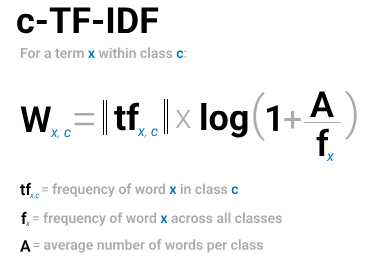

Nós podemos alterar alguns parâmetros desse último caso, segundo a documentação os mais importantes são: bm25_weighting e reduce_frequent_words. o primeiro é dito como poderoso para data sets com poucos documentos, já o segundo é bom para reduzir palavras frequentes.

Os dois parecem se encaixar bem, pois são dois problemas dos dados utilizados, ele é pequeno e os tópicos repetem muitas palavras.


In [ ]:
#usarei o modelo treinado anteriormente no teste de vectorizer para testar comparar as mudanças
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,987,-1_deus_senhor_jesus_pra,"[deus, senhor, jesus, pra, vai, vida, amor, mu...",[Se a vida está difícil e os dias\nnão te faze...
1,0,2414,0_pra_amor_vai_vou,"[pra, amor, vai, vou, coração, quero, tá, tô, ...","[Ilusão\nImaginar você pra mim, você jamais me..."
2,1,113,1_jesus_cristo_cruz_feliz,"[jesus, cristo, cruz, feliz, sangue, deus, sen...",[O homem sem Deus é um réu\nnão tem paz no cor...
3,2,98,2_senhor_deus_ti_quero,"[senhor, deus, ti, quero, és, perto, sei, mim,...",[Minh'alma engrandece ao Senhor\nMinh'alma eng...
4,3,65,3_senhor_deus_santo_aleluia,"[senhor, deus, santo, aleluia, glória, és, ale...","[Senhor, Tu és bom, Tua misericórdia é pra sem..."
5,4,61,4_maria_mãe_senhora_jesus,"[maria, mãe, senhora, jesus, ave, porque, deus...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
6,5,58,5_pra_vai_ninguém_outro,"[pra, vai, ninguém, outro, atômica, faz, tudo,...","[Sem janelas, só espelhos\nA boa vida no apert..."
7,6,41,6_povo_vou_deus_vou vou,"[povo, vou, deus, vou vou, vai, pra, pão, paz,...",[Eu sei das dores que o teu povo enfrenta\nE s...
8,7,23,7_filho_voz_és_pai,"[filho, voz, és, pai, filho pródigo, pródigo, ...",[Filho sente aqui perto de mim\nVamos conversa...
9,8,21,8_viver_vezes_pra_ter,"[viver, vezes, pra, ter, vida, viver viver, aq...","[deve existir uma nova forma de ver,\nde olhos..."


In [ ]:
from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True, reduce_frequent_words=True)
topic_model.update_topics(df_pt_escolhido['Lyric'], vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,987,-1_deus_senhor_jesus_pai,"[deus, senhor, jesus, pai, paz, santo, ti, mun...",[Se a vida está difícil e os dias\nnão te faze...
1,0,2414,0_pra_amor_vou_vai,"[pra, amor, vou, vai, tá, tô, quero, coração, ...","[Ilusão\nImaginar você pra mim, você jamais me..."
2,1,113,1_jesus_cristo_cruz_sangue,"[jesus, cristo, cruz, sangue, feliz jesus, fel...",[O homem sem Deus é um réu\nnão tem paz no cor...
3,2,98,2_senhor_ti_és_perto,"[senhor, ti, és, perto, perto senhor, deus, qu...",[Minh'alma engrandece ao Senhor\nMinh'alma eng...
4,3,65,3_ale_aleluia_ale ale_santo,"[ale, aleluia, ale ale, santo, glória, bendize...","[Senhor, Tu és bom, Tua misericórdia é pra sem..."
5,4,61,4_maria_mãe_senhora_ave,"[maria, mãe, senhora, ave, ave maria, nazaré, ...","[Ave Maria! Ave Maria!\nBom dia, bom dia, bom ..."
6,5,58,5_atômica_outro outro_bomba atômica_ponto cego,"[atômica, outro outro, bomba atômica, ponto ce...","[Sem janelas, só espelhos\nA boa vida no apert..."
7,6,41,6_povo_vou vou_vou vou vou_conselho,"[povo, vou vou, vou vou vou, conselho, vez con...",[Eu sei das dores que o teu povo enfrenta\nE s...
8,7,23,7_filho_filho pródigo_pródigo_ouvi dizer,"[filho, filho pródigo, pródigo, ouvi dizer, vo...",[Filho sente aqui perto de mim\nVamos conversa...
9,8,21,8_viver viver_vezes_viver_pra continuar,"[viver viver, vezes, viver, pra continuar, ter...","[deve existir uma nova forma de ver,\nde olhos..."


Aconteceram algumas mudanças, mas nesse caso elas não se mostraram muito efetivas.

#Dynamic Topic Modeling no BERTopic:

Há diferentes tipos de topic modeling disponíveis no BERTopic: Dinâmica, hierárquica, multimodal, online, semi-supervisionada, supervisionada, manual e guiada.

Para esse estudo inicial, dessas variações, só vou olhar a modelagem de tópico dinâmica, tipo discutido dentro do grupo, com possível uso futuro.

Por esse data set não apresentar marcações temporais nítidas, não demonstrarei nenhuma aplicação nesse notebook, deixarei para futuras testagens com outros textos. A aplicação do código é bem simples, basta aplicar uma função aos modelo treinado com os textos do data set mais a temporalidade, logo o mais importante é entender seu funcionamento mesmo.

Uma vez treinado com os dados iniciais o BERTopic não precisará ser rodado mais nenhuma vez para criar a modelagem temporal, basta passar os dados com o tempo para ele. A partir da representação geral do modelo ele usará a representação global dos tópicos princpiais em diferentes tempos. A cada tópico e a cada data ele calculará a representação do c-TFIDF o que gerará, sem a necessidade de nova geração de embeddings, uma respresentação de tópico específica a cada data.


Essa modelagem dinâmica pode ser global ou evolucionária. A primeira é feita partindo das média das representações dos c-TFIDF em cada tempo t, isso permite que cada representação de tópico mova-se levemente em direção à representação global, mantendo algumas palavras específicas. A evolucionária faz também uma  média das representações dos c-TFIDF em cada tempo t, contudo ela parte dessa representação em t-1. Isso é feita tópico por tópico, permitindo mostrar a evolução do tópico em geral.

Como padrão os dois jeitos são postos como "True" havendo uma mistura na suas ações, podemos escolher qual usar, para nossos objetivos os dois podem ser interessantes, o primeiro trará a questão da formação de consenso, enquanto o segundo trará a evolução das diversas opniões e argumentos.

Um importante parâmetro a ser escolhido é o número de estados temporais, por exemplo em tweets sobre a covid seria provavelmente o número de meses presentes no data set. É recomendado um máximo de 50 estados temporais.


Um exemplo de representação da modelagem dinâmica:

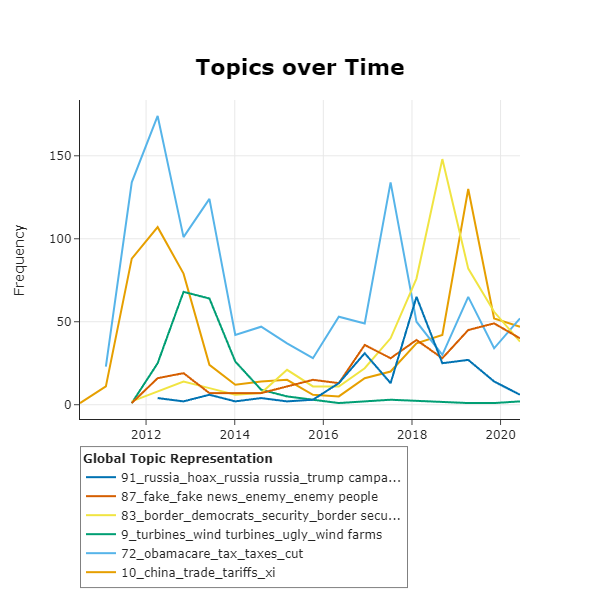

#Conclusões:

O objetivo desse notebook era passar pelos 5 passos da pipiline básica do BERTopic, partindo de um data set aleatório de músicas, que acabou não se mostrando muito produtivo, estudar os passos, suas funções, variações, parâmetros e etc.

O BERTopic se mostrou como um modelador de tópico enormemente amplo, apenas nesses 5 passos há uma infinidade de variões e possibilidades que podem ser combinadas para um resultado satisfatório. Uma percepção após o estudo teórico e prático é que os o tipo de uso depende muito do data set que teremos para analisar.

Ainda há muita coisa a ser explorada dentro dele, principalmente no que se refere à representação final dos tópicos, no fim a parte mais importante. São disponibilizadas diversas integrações com outros algoritmos que podem melhorar ou mesmo criar novas perspectivas de representação dos tópicos gerados. Além disso também há alguns parâmetros do próprio BERTopic a serem explorados.

O dataset escolhido acabou não me agradando muito durante o andamento do estudo, a pequena quantidade de documentos e o tipo deles, além de uma não apuração minuciosa, geraram problemas, portanto os próximos passos estudos serão feitos num novo dataset.

Fontes:
https://hdbscan.readthedocs.io/en/latest/api.html

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

https://hdbscan.readthedocs.io/en/latest/parameter_selection.html

https://umap-learn.readthedocs.io/en/latest/parameters.html

https://umap.scikit-tda.org/api.html

https://pair-code.github.io/understanding-umap/

https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization

https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html

https://maartengr.github.io/BERTopic/getting_started/dim_reduction/dim_reduction.html

https://maartengr.github.io/BERTopic/getting_started/clustering/clustering.html

https://maartengr.github.io/BERTopic/getting_started/vectorizers/vectorizers.html

https://maartengr.github.io/BERTopic/getting_started/ctfidf/ctfidf.html